In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('timesData_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [4]:
df.describe( include = 'all')

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
count,2603,2603,2603,2603.000000,2603,2603.000000,2603.000000,2603,2603,2544,2544.000000,2536,2370,2603.000000
unique,250,818,72,NaN,804,NaN,NaN,613,415,794,NaN,53,69,NaN
top,301-350,Harvard University,United States of America,NaN,29.6,NaN,NaN,-,-,"20,152",NaN,7%,54 : 46,NaN
freq,248,6,659,NaN,10,NaN,NaN,218,1402,6,NaN,142,185,NaN
mean,NaN,NaN,NaN,37.801498,NaN,35.910257,60.921629,NaN,NaN,NaN,18.445283,NaN,NaN,2014.075682
std,NaN,NaN,NaN,17.604218,NaN,21.254805,23.073219,NaN,NaN,NaN,11.458698,NaN,NaN,1.685733
min,NaN,NaN,NaN,9.900000,NaN,2.900000,1.200000,NaN,NaN,NaN,0.600000,NaN,NaN,2011.000000
25%,NaN,NaN,NaN,24.700000,NaN,19.600000,45.500000,NaN,NaN,NaN,11.975000,NaN,NaN,2013.000000
50%,NaN,NaN,NaN,33.900000,NaN,30.500000,62.500000,NaN,NaN,NaN,16.100000,NaN,NaN,2014.000000
75%,NaN,NaN,NaN,46.400000,NaN,47.250000,79.050000,NaN,NaN,NaN,21.500000,NaN,NaN,2016.000000


In [5]:
df_qual = df.select_dtypes(include = 'object')

for col in df_qual.columns:
    if len(df_qual[col].value_counts()) > 10:
        print(f'Unique values in {col} are: {df_qual[col].unique()}')
    else:
        print(df_qual[col].value_counts())

Unique values in world_rank are: ['1' '2' '3' '4' '5' '6' '8' '9' '10' '11' '12' '13' '14' '15' '17' '18'
 '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '32' '33'
 '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '47' '48' '49' '51'
 '52' '53' '54' '55' '56' '57' '58' '59' '60' '61' '63' '64' '65' '66'
 '67' '68' '71' '72' '73' '75' '76' '77' '78' '79' '81' '83' '85' '86'
 '87' '88' '89' '90' '93' '94' '95' '98' '99' '100' '101' '102' '103'
 '104' '105' '106' '107' '109' '111' '112' '114' '115' '117' '118' '119'
 '120' '122' '124' '127' '128' '129' '130' '132' '135' '136' '137' '138'
 '139' '140' '142' '143' '144' '145' '147' '149' '151' '152' '155' '156'
 '158' '159' '161' '163' '164' '165' '167' '168' '170' '171' '172' '173'
 '174' '177' '178' '181' '182' '183' '184' '185' '186' '187' '189' '190'
 '193' '195' '196' '197' '199' '7' '16' '31' '44' '45' '46' '62' '69' '70'
 '74' '80' '84' '91' '92' '96' '97' '108' '110' '113' '116' '121' '123'
 '125' '131' '133' '134' '14

In [6]:
df['world_rank'].value_counts()

world_rank
301-350    248
601-800    200
351-400    198
276-300    104
201-225    103
          ... 
=110         2
=123         2
=125         2
=60          2
179          1
Name: count, Length: 250, dtype: int64

In [7]:
df['world_rank'] = df['world_rank'].str.replace('=', '')
df[['female_ratio', 'other']] = df['female_male_ratio'].str.split(n = 1, expand = True)

subset = ['num_students', 'student_staff_ratio', 'international_students', 'female_ratio', 'international', 'income', 'total_score']
null_values = ['-', '']

for col in subset:
    df.loc[df[col] == '-', col] = np.nan
    df.loc[df[col] == '', col] = np.nan

df['num_students'] = df['num_students'].str.replace(',','')
df['num_students'] = pd.to_numeric(df['num_students'])

df['international_students'] = df['international_students'].str.replace('%','')
df['international_students'] = pd.to_numeric(df['international_students']) / 100

df['female_ratio'] = pd.to_numeric(df['female_ratio']) / 100

In [8]:
col_to_float = ['international', 'income', 'total_score']

for col in col_to_float:
    df[col] = pd.to_numeric(df[col])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2594 non-null   float64
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2385 non-null   float64
 8   total_score             1201 non-null   float64
 9   num_students            2544 non-null   float64
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   float64
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
 14  female_ratio            2367 non-null   

In [10]:
#study_df = df.dropna( subset = ['total_score'])
study_df = df.dropna()
study_df = study_df.drop('other', axis = 1)
study_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 1 to 2002
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              954 non-null    object 
 1   university_name         954 non-null    object 
 2   country                 954 non-null    object 
 3   teaching                954 non-null    float64
 4   international           954 non-null    float64
 5   research                954 non-null    float64
 6   citations               954 non-null    float64
 7   income                  954 non-null    float64
 8   total_score             954 non-null    float64
 9   num_students            954 non-null    float64
 10  student_staff_ratio     954 non-null    float64
 11  international_students  954 non-null    float64
 12  female_male_ratio       954 non-null    object 
 13  year                    954 non-null    int64  
 14  female_ratio            954 non-null    float6

In [176]:
# nulls = study_df.isnull().sum()


pandas.core.series.Series

In [160]:
# for indx, value in enumerate(nulls):
#     if value > 0:
#         temp_df_1 = df.iloc[:, [indx]].isnull()
#         for name in temp_df_1['university_name'].unique():
#             temp_df = df[df['university_name'] == name].dropna(subset = ['international'])
#             n = np.average(temp_df['international'])
#             print(n)

70.62
70.67999999999999
22.059999999999995
70.47999999999999
51.220000000000006
68.74
78.11999999999999
46.72
45.04


<Axes: >

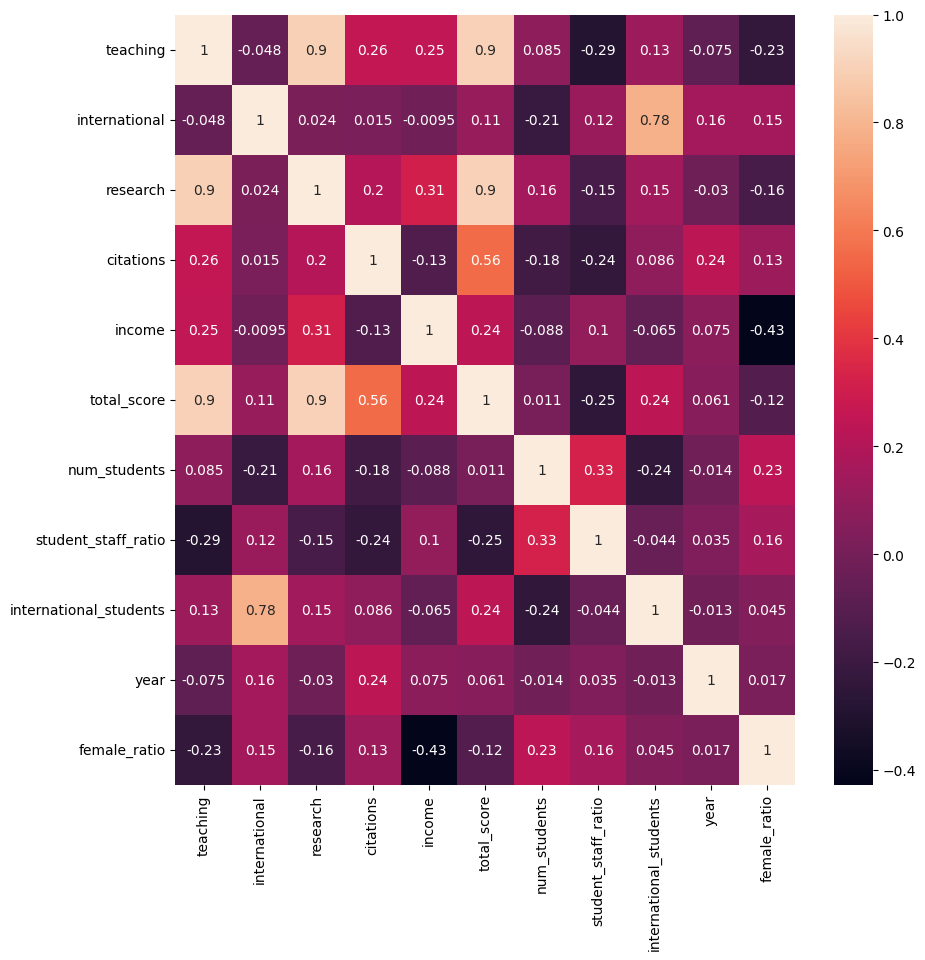

In [11]:
df_quant = study_df.select_dtypes(exclude = 'object')
corr_model = df_quant.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr_model, annot = True)

1. There is a strong positive correlation between teaching, research and total_score
2. Teaching and research also have strong relations between each other. This must be considered building a model

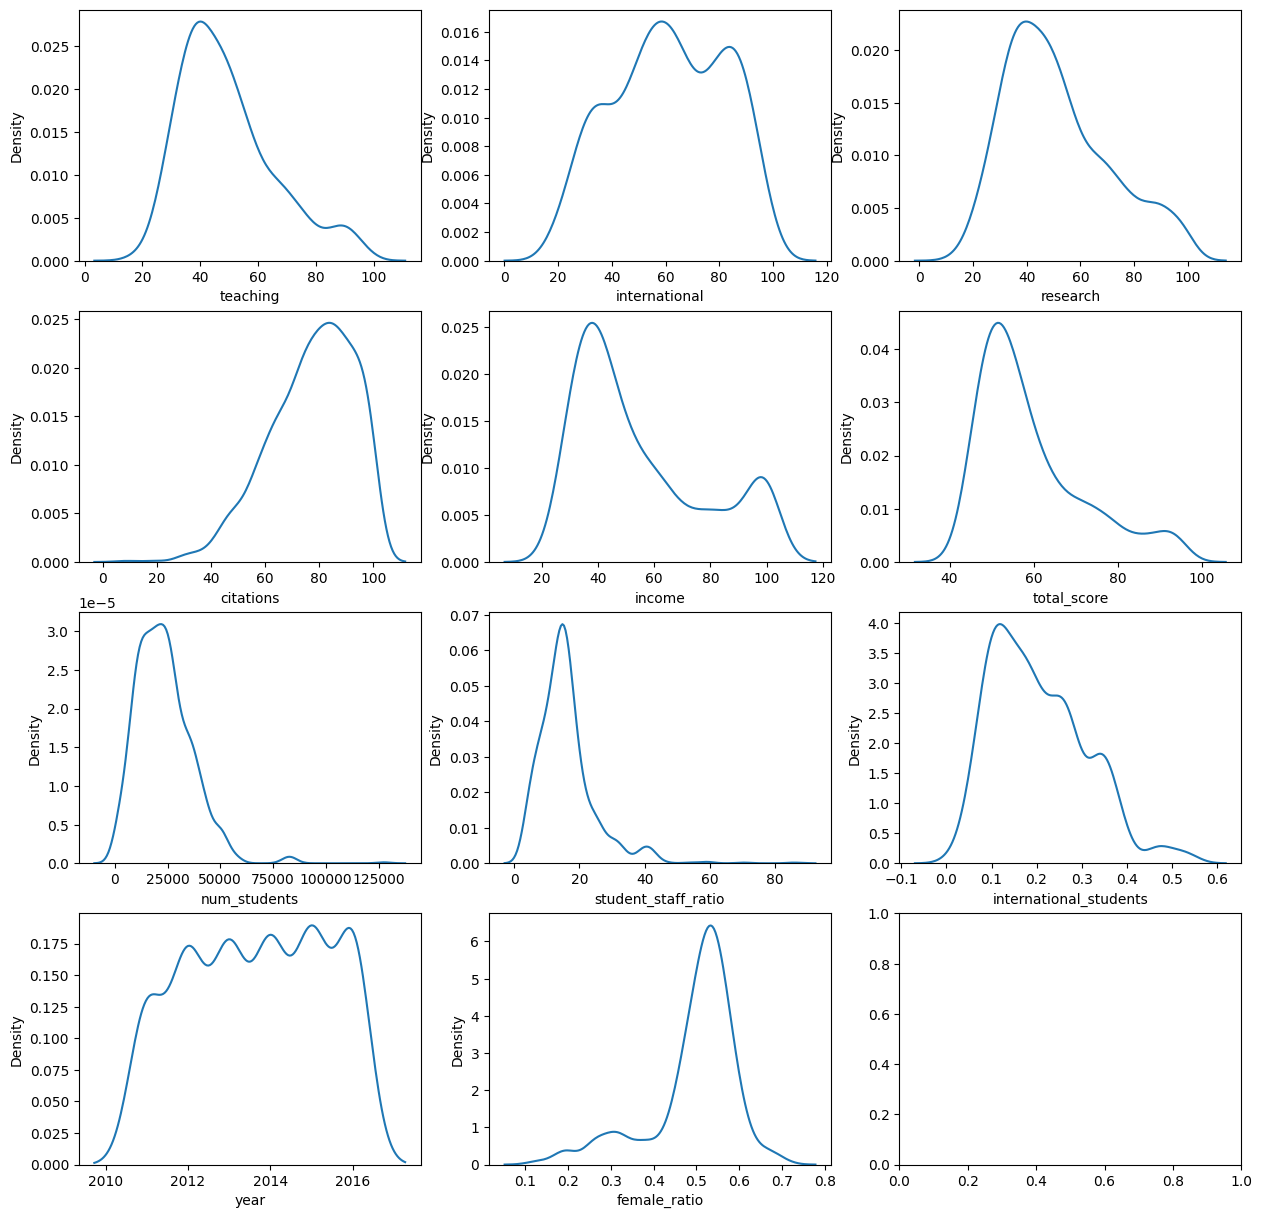

In [12]:
fig, axes = plt.subplots(4, 3, figsize = (15, 15))

for idx, col in enumerate(df_quant):
      sns.kdeplot(study_df[col], ax = axes[idx // 3, idx % 3])

In [13]:
df_quant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 1 to 2002
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   teaching                954 non-null    float64
 1   international           954 non-null    float64
 2   research                954 non-null    float64
 3   citations               954 non-null    float64
 4   income                  954 non-null    float64
 5   total_score             954 non-null    float64
 6   num_students            954 non-null    float64
 7   student_staff_ratio     954 non-null    float64
 8   international_students  954 non-null    float64
 9   year                    954 non-null    int64  
 10  female_ratio            954 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 89.4 KB


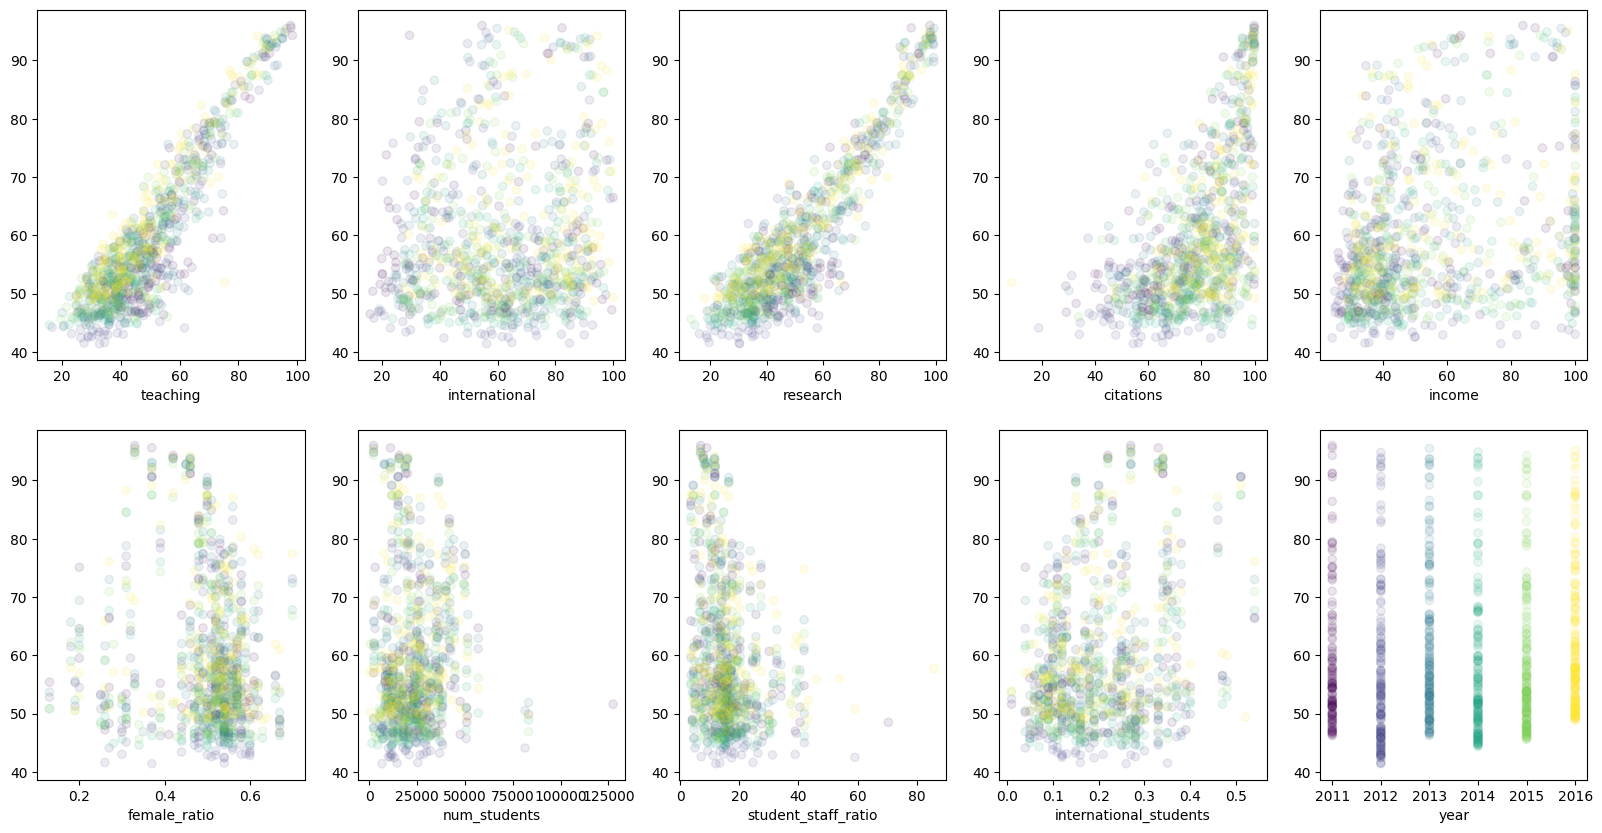

In [53]:
fig, axes = plt.subplots(2, 5, figsize = (20, 10))
target = 'total_score'

for idx, col in enumerate(df_quant):
    if col != target:
        if idx == 10:
            idx = 5
        axes[idx // 5, idx % 5].scatter(x = df_quant[col], y = df_quant[target], alpha = 0.1, c = df_quant['year'])
        axes[idx // 5, idx % 5].set_xlabel(col)


Conclusions:

1. Teaching and Research have lost some variation and are more consentrated around trend line
2. The universities in general have more citations
3. Grew share of universities with higher female ratio
4. In general all the universities has gained higher total score recently

In [24]:
study_df['world_rank'].unique()
study_df['world_rank'] = pd.to_numeric(study_df['world_rank'])

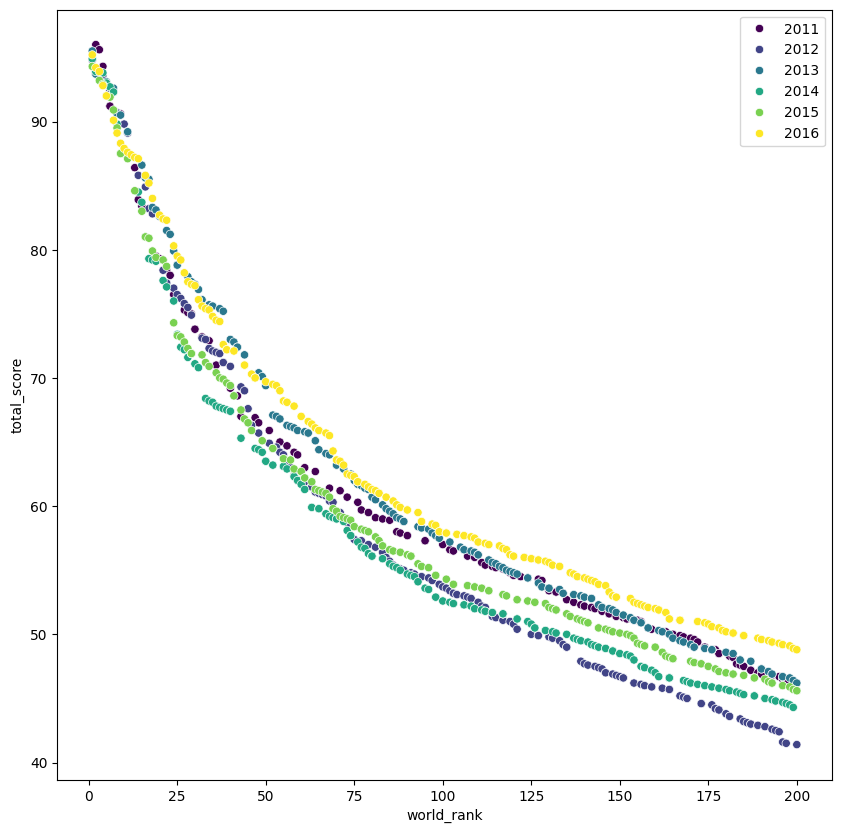

In [54]:
plt.figure(figsize = (10, 10))
sns.scatterplot(study_df, x = 'world_rank', y = 'total_score', hue = 'year', palette = 'viridis')
plt.legend()
